In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\Shipun Meher\Downloads\Home_Loan_Cleaned_Data.xlsx")
df.head(7)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total Income,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,0,-0.212457,0.27235,1,0,-0.145708,False,False
1,1,1,0,0,1,-0.950299,0.27235,1,1,-0.615239,False,True
2,1,1,0,1,0,-0.307663,0.27235,1,1,-0.320396,False,True
3,1,0,0,0,0,-0.057749,0.27235,1,1,-0.159531,False,True
4,1,1,2,0,1,1.441736,0.27235,1,1,0.389294,False,True
5,1,1,0,1,0,-0.605180,0.27235,1,1,-0.486273,False,True
6,1,1,3,0,0,0.144563,0.27235,0,0,-0.229406,True,False


In [3]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [4]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 1.LogisticRegression

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

#Predict on train
ypred_train=lr.predict(x_train)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Predict on Test
ypred_test=lr.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("CV_Score:",cross_val_score(lr,x_train,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy: 0.8108747044917257
Test Accuracy: 0.8301886792452831
CV_Score: 0.801484593837535


In [7]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))


confusion_matrix: [[16 17]
 [ 1 72]]
              precision    recall  f1-score   support

           0       0.94      0.48      0.64        33
           1       0.81      0.99      0.89        73

    accuracy                           0.83       106
   macro avg       0.88      0.74      0.76       106
weighted avg       0.85      0.83      0.81       106



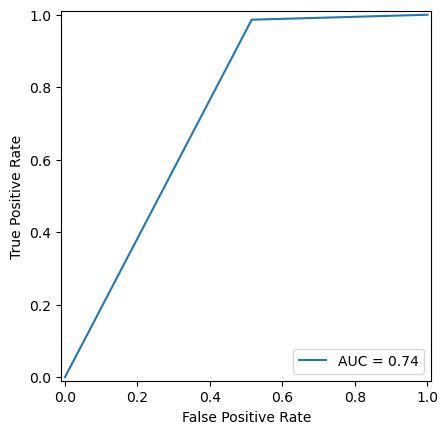

In [8]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,tresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr , tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

# 2.KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
estimator= KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,20)),'p':[1,2]}
knn = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn.fit(x_train,y_train)
knn.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [11]:
knn_model =knn.best_estimator_
knn_model.fit(x_train,y_train)

#Predict on train
ypred_train=knn_model.predict(x_train)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Predict on Test
ypred_test=knn_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("CV_Score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy: 0.8037825059101655
Test Accuracy: 0.8018867924528302
CV_Score: 0.7494397759103641


# 3.Support Vector Machine

In [13]:
from sklearn.svm import SVC
estimator=SVC()
param_grid = {"C" : [0.01,0.1,1], "kernel" : ["linear","rbf","sigmoid","poly"]}
svm_grid=GridSearchCV(estimator , param_grid , scoring ="accuracy",cv=5)
svm_grid.fit(x_train,y_train)
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [14]:
svm_model=svm_grid.best_estimator_
svm_model.fit(x_train,y_train)

#Predict on train
ypred_train=knn_model.predict(x_train)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Predict on Test
ypred_test=knn_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("CV_Score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy: 0.8037825059101655
Test Accuracy: 0.8018867924528302
CV_Score: 0.7494397759103641


# 4.Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

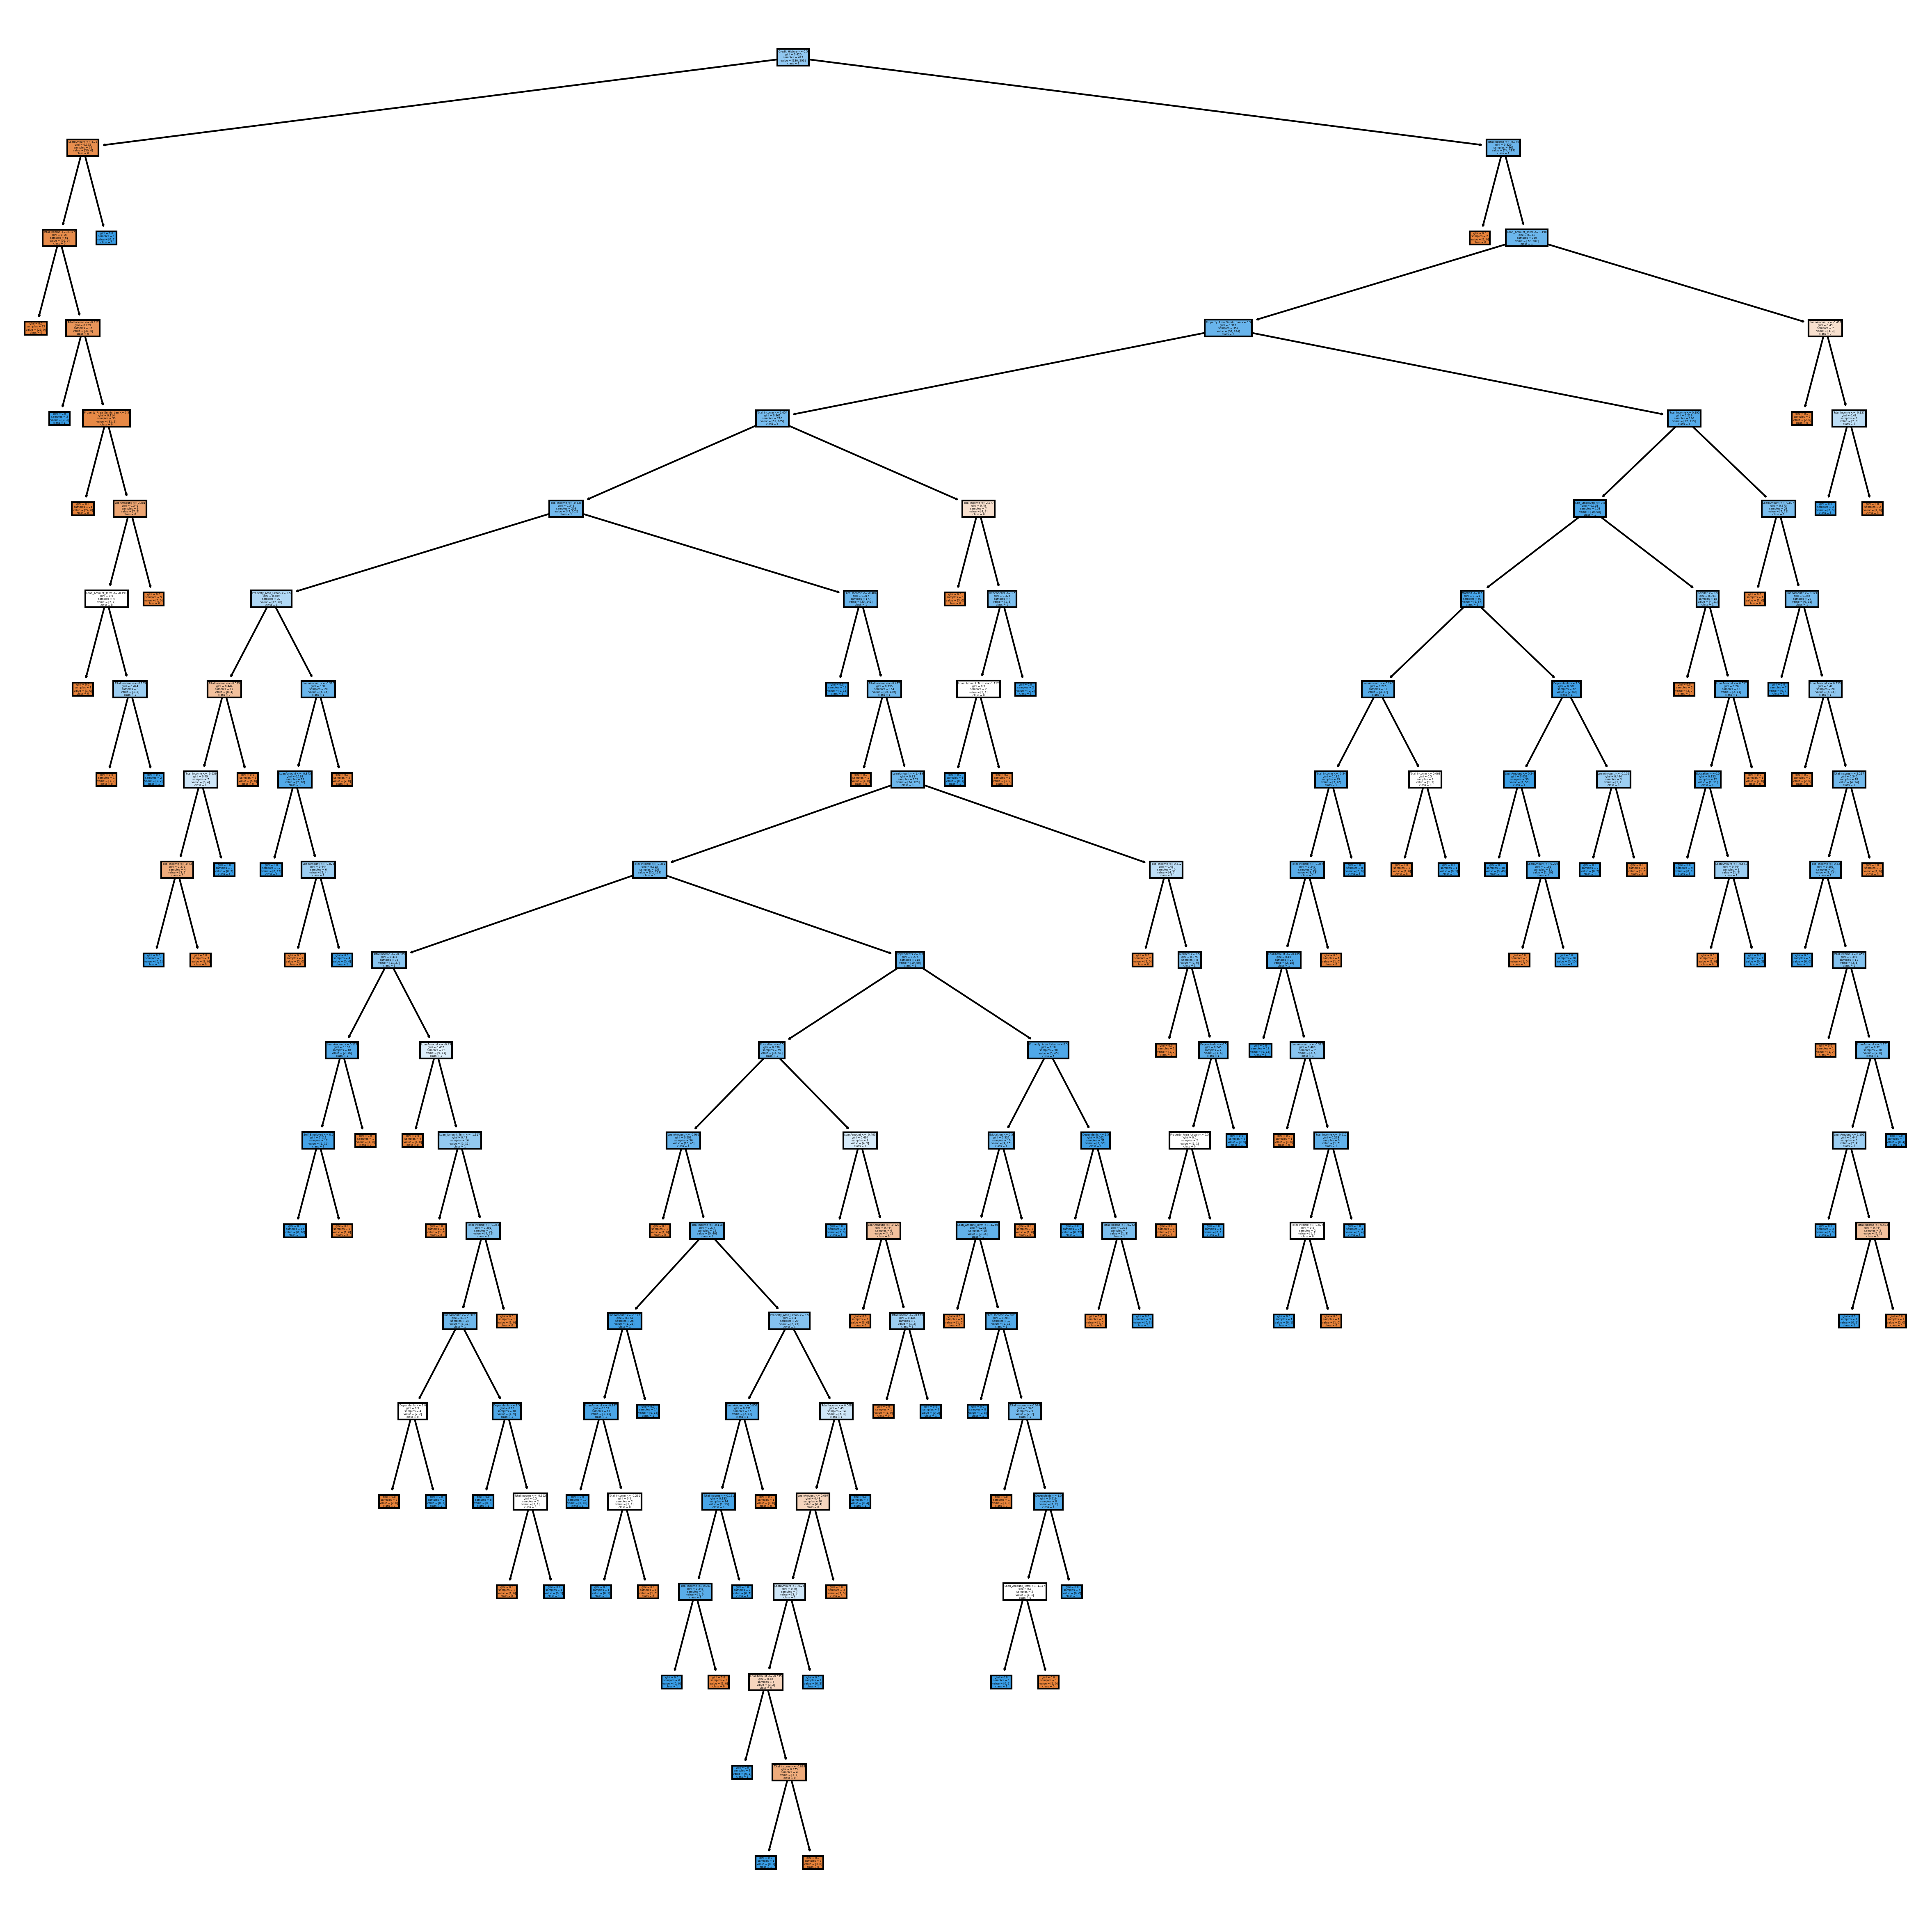

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
         feature_names=x_train.columns.tolist(),
         class_names=["0","1"])
plt.show()

In [18]:
estimator= DecisionTreeClassifier(random_state=True)
param_grid={"criterion":["gini","entropy"],
           "max_depth": list(range(1,20))}
dt_grid=GridSearchCV(estimator,param_grid , scoring ="accuracy" , cv=5)
dt_grid.fit(x_train,y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [19]:
feature_ab=pd.DataFrame(data=dt.feature_importances_,
                       index=x.columns,
                       columns=["Importance"])

important_features_dt=feature_ab[feature_ab["Importance"]>0].index.tolist()
important_features_dt


['Credit_History']

In [20]:
x_train_dt=x_train[important_features_dt]
x_test_dt=x_test[important_features_dt]
dt=dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)

#Predict on train
ypred_train=dt.predict(x_train_dt)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Predict on Test
ypred_test=dt.predict(x_test_dt)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("CV_Score:",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy: 0.8108747044917257
Test Accuracy: 0.8301886792452831
CV_Score: 0.8109243697478992


# 5.Random Forest Classifier

In [22]:
# HyperParameter Tuning
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=True)
param_grid={"n_estimators" : list(range(1,50))}
rf_grid = GridSearchCV(estimator , param_grid , scoring = "accuracy" , cv=5)
rf_grid.fit(x_train,y_train)
rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=43, random_state=True)

In [23]:
# Important Features
feature_rf=pd.DataFrame(data=rf.feature_importances_,
                       index=x.columns,
                       columns=["Importance"])

important_features_rf=feature_rf[feature_rf["Importance"]>0].index.tolist()
important_features_rf




['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total Income',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [24]:
x_train_rf=x_train[important_features_rf]
x_test_rf=x_test[important_features_rf]
rf=rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

#Predict on train
ypred_train=rf.predict(x_train_rf)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Predict on Test
ypred_test=rf.predict(x_test_rf)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("CV_Score:",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy: 1.0
Test Accuracy: 0.8301886792452831
CV_Score: 0.801484593837535


# 6.AdaBoost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,20))}
ab_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(x_train,y_train)
ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=1, random_state=True)

In [27]:
fea=pd.DataFrame(data=ab.feature_importances_,
                index=x.columns,columns=["Importance"])
important_features=fea[fea["Importance"]>0].index.tolist()
important_features

['Credit_History']

In [28]:
x_train_ab=x_train[important_features]
x_test_ab=x_test[important_features]

ab=ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

ypred_train=ab.predict(x_train_ab)
ypred_test=ab.predict(x_test_ab)

print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,ypred_test))

print("CV_score:",cross_val_score(ab,x_train,y_train,cv=5,scoring='accuracy').mean())

Train_accuracy: 0.8108747044917257
Test_accuracy: 0.8301886792452831
CV_score: 0.8109243697478992


# 7.Gradient Boost

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,20)),
           "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(x_train,y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=5, random_state=True)

In [31]:
featr=pd.DataFrame(data=gb.feature_importances_,
                index=x.columns,columns=["Importance"])
important_features_gb=featr[featr["Importance"]>0].index.tolist()
important_features_gb

['Married',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total Income',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [32]:
x_train_gb=x_train[important_features_gb]
x_test_gb=x_test[important_features_gb]


gb=gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

ypred_train=gb.predict(x_train_gb)
ypred_test=gb.predict(x_test_gb)


print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,ypred_test))

print("CV_score:",cross_val_score(gb,x_train,y_train,cv=5,scoring='accuracy').mean())

Train_accuracy: 0.8156028368794326
Test_accuracy: 0.8301886792452831
CV_score: 0.8038375350140056


# XG Boost

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators':[10,20,40,100],
           'max_depth':[3,4,5],
           'gamma':[0,0.15,0.3,0.5,1]}
xgb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(x_train,y_train)
xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
feat=pd.DataFrame(data=xgb.feature_importances_,
                index=x.columns,columns=["Importance"])
important_features_xgb=feat[feat["Importance"]>0].index.tolist()
important_features_xgb

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total Income',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [36]:
x_train_xgb=x_train[important_features_xgb]
x_test_xgb=x_test[important_features_xgb]

xgb=xgb_grid.best_estimator_
xgb.fit(x_train_xgb,y_train)

ypred_train=xgb.predict(x_train_xgb)
ypred_test=xgb.predict(x_test_xgb)

print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,ypred_test))

print("CV_score:",cross_val_score(xgb,x_train,y_train,cv=5,scoring='accuracy').mean())

Train_accuracy: 0.8463356973995272
Test_accuracy: 0.8301886792452831
CV_score: 0.8108683473389355


# Saving Best Model

In [38]:
from joblib import dump
dump (dt, "Home_Loan_Prediction.joblib")

['Home_Loan_Prediction.joblib']

Prediction On New Data

In [40]:
input_data = {"Loan_ID" : "LP001006" ,
              "Gender":"Male",
              "Married":"Yes",
              "Dependents": 0,
              "Education":"Not Graduate",
              "Self_Employed":"No",
              "ApplicantIncome":2583,
              "CoapplicantIncome":2358.0,
              "LoanAmount":120,
              "Loan_Amount_Term":360.0,
              "Credit_History":"Good",
              "Property_Area":"Urban"}

In [41]:
data=pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,Good,Urban


In [42]:
data["Total Income"]=data["ApplicantIncome"] + data["CoapplicantIncome"]
data["Total Income"]

data=data.dropna(subset=['LoanAmount','Loan_Amount_Term','Credit_History','Total Income'])
data
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data["Married"].fillna(data["Married"].mode()[0], inplace = True)

data["Dependents"]=data["Dependents"].replace({"3+":3})
data["Dependents"]
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace = True)
data["Dependents"]=data["Dependents"].astype("int")
data["Dependents"]

data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])


data=data.dropna(subset=['LoanAmount','Loan_Amount_Term','Credit_History','Total Income'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total Income
0,LP001006,Male,Yes,0,Not Graduate,No,120,360.0,Good,Urban,4941.0


In [43]:
#Encoding of Gender Column as "Female":0,"Male":1
data["Gender"] = data["Gender"].replace({"Female":0,"Male":1})


#Encoding of Self_Employed Column as "No":0,"Yes":1
data["Self_Employed"] = data["Self_Employed"].replace({"No":0,"Yes":1})


#Encoding of Credit_History Column as Bad":0,"Good":1
data["Credit_History"] = data["Credit_History"].replace({"Bad":0,"Good":1})

#Encoding of Education Column as "Graduate":0,"Not Graduate":1
data["Education"] = data["Education"].replace({"Graduate":0,"Not Graduate":1})

#Encoding of Married Column as "No":0,"Yes":1
data["Married"] = data["Married"].replace({"No":0,"Yes":1})

#Encoding of Married Column as "N":0,"Y":1
# data["Loan_Status"] = data["Loan_Status"].replace({"N":0,"Y":1})

#One-Hot-Encoding of Property_Area Column
data = pd.get_dummies(data, columns=["Property_Area"], drop_first=True)



from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_cols = ["LoanAmount", "Loan_Amount_Term", "Total Income"]
data[num_cols] = sc.fit_transform(data[num_cols])

In [89]:
x_new=data
x_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Total Income
0,LP001006,1,1,0,1,0,0.0,0.0,1,0.0


In [93]:
x_new=x_new[important_features_dt]
dt.predict(x_new)

array([1], dtype=int64)